# **DAV LEVEL 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load GHG Emission data
ghgEmission = "drive/My Drive/Study/DAV/co2_data.csv"
northHemIce = "drive/My Drive/Study/DAV/north_hemisphere_ice.xlsx"
southHemIce = "drive/My Drive/Study/DAV/south_hemishpere_ice.xlsx"
df_ghg = pd.read_csv(ghgEmission)
df_northHemIce = pd.read_excel(northHemIce)
df_southHemIce = pd.read_excel(southHemIce)
# display(df_ghg)

# Set max_rows and max_columns options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Select a range of years (1990 to 2021)
start_year = 1990
end_year = 2021
selected_rows = df_ghg.loc[(df_ghg['year'] >= start_year) & (df_ghg['year'] <= end_year)]

In [ ]:
#value to be removed as country
values_to_remove = ['Africa (GCP)','Aland Islands','American Samoa','Asia (GCP)','Asia (excl. China and India)', 'Central America (GCP)','Europe (GCP)', 'European Union (27) (GCP)', 'Falkland Islands', 'Guernsey', 'Isle of Man', 'Jersey',
'Middle East (GCP)', 'Netherlands Antilles', 'Non-OECD (GCP)', 'OECD (GCP)', 'Oceania (GCP)','Puerto Rico','Saint Martin (French part)', 'South America (GCP)','Svalbard and Jan Mayen','United States Virgin Islands','Western Sahara','World','Europe' 'Europe (excl. EU-27)',
 'Europe (excl. EU-28)',
 'European Union (27)',
 'European Union (28)',
 'North America',
 'North America (GCP)',
 'North America (excl. USA)',
 'South America',
 'Upper-middle-income countries',
 'International transport',
 'High-income countries',
 'Asia',
 'Low-income countries',
 'Lower-middle-income countries',
 'Africa',
 'Europe',
 'Europe (excl. EU-27)',]

# Filter the DataFrame to remove rows that match the values in the array
df_filteredCountry = selected_rows[~selected_rows['country'].isin(values_to_remove)]

# Write the filtered DataFrame back to the CSV file
# display(df_filteredCountry)
# df_filteredCountry.to_csv('newData.csv', index=False)

In [ ]:
# Define columns to keep
columns_to_keep = ['country', 'year','population','cement_co2','cement_co2_per_capita','co2','co2_per_capita','coal_co2','coal_co2_per_capita','flaring_co2','flaring_co2_per_capita','gas_co2','gas_co2_per_capita','land_use_change_co2','land_use_change_co2_per_capita','methane','methane_per_capita','nitrous_oxide','nitrous_oxide_per_capita','oil_co2','oil_co2_per_capita','total_ghg']

# Keep only specified columns in the DataFrame
df_final = df_filteredCountry[columns_to_keep]

# display(df_final)

In [ ]:
missing_percentages = df_final.isnull().sum() / len(df_final) * 100
display(missing_percentages)

country                            0.000000
year                               0.000000
population                         0.269848
cement_co2                         2.698480
cement_co2_per_capita              2.968328
co2                                0.255646
co2_per_capita                     0.525494
coal_co2                           0.298253
coal_co2_per_capita                0.568101
flaring_co2                        0.298253
flaring_co2_per_capita             0.568101
gas_co2                            0.298253
gas_co2_per_capita                 0.568101
land_use_change_co2                8.649340
land_use_change_co2_per_capita     8.649340
methane                           17.341287
methane_per_capita                17.341287
nitrous_oxide                     17.341287
nitrous_oxide_per_capita          17.341287
oil_co2                            0.298253
oil_co2_per_capita                 0.568101
total_ghg                         17.355489
dtype: float64

In [ ]:
df_greeenHouseGas = df_final.copy()

# #Total use of GHG in a year
# df_greeenHouseGas['total_ghg'] = df_greeenHouseGas['co2'] + df_greeenHouseGas['methane'] + df_greeenHouseGas['nitrous_oxide']

column_name = 'country'
num_unique_country = df_greeenHouseGas[column_name].unique()
num_unique_values_count = df_greeenHouseGas[column_name].nunique()

unique_values_country_list = num_unique_country.tolist()

# Print the result
# print(f'The number of unique values in {column_name} is {num_unique_values_count}.')
# display(unique_values_list)

In [ ]:
#Mean according to country for imputation of data
mean_accor_country = {}

for country in unique_values_country_list:
  countryName = country
  selecte_country_rows = df_greeenHouseGas.loc[(df_greeenHouseGas['country'] == countryName)]
  # display(selecte_country_rows)
  mean_accor_year = {}
  for column_name in selecte_country_rows.columns:
    if selecte_country_rows[column_name].dtype != object:
        mean = selecte_country_rows[column_name].mean()
        mean_accor_year[column_name] = mean
  
  mean_accor_country[country] = mean_accor_year


In [ ]:
display(mean_accor_country['Afghanistan'])

{'year': 2005.5,
 'population': 24929732.28125,
 'cement_co2': 0.032093750000000004,
 'cement_co2_per_capita': 0.0015,
 'co2': 5.0441875,
 'co2_per_capita': 0.1759375,
 'coal_co2': 1.45146875,
 'coal_co2_per_capita': 0.04478125,
 'flaring_co2': 0.0085,
 'flaring_co2_per_capita': 0.0005,
 'gas_co2': 0.30800000000000005,
 'gas_co2_per_capita': 0.01471875,
 'land_use_change_co2': 0.632125,
 'land_use_change_co2_per_capita': 0.020968750000000005,
 'methane': 11.642333333333335,
 'methane_per_capita': 0.4971,
 'nitrous_oxide': 3.8856666666666664,
 'nitrous_oxide_per_capita': 0.1721,
 'oil_co2': 3.2443125000000004,
 'oil_co2_per_capita': 0.11434375000000001,
 'total_ghg': 18.11466666666667}

In [ ]:
# Loop through the rows and columns and replace null values with country name
for i, row in df_greeenHouseGas.iterrows():
    country = row['country']  # Assume that the country name is in the 'Country' column
    for column_name in df_greeenHouseGas.columns:
        if pd.isnull(row[column_name]):
            replacement_value = mean_accor_country[country][column_name];
            # print(replacement_value)
            if np.isnan(replacement_value) :
              df_greeenHouseGas.at[i, column_name] = 0.0
            else:
              df_greeenHouseGas.at[i, column_name] = mean_accor_country[country][column_name]

missing_percentages = df_greeenHouseGas.isna().sum() 
# display(missing_percentages)

In [ ]:
#check
afgan = df_greeenHouseGas.loc[(df_greeenHouseGas['year'] == 2020) & (df_greeenHouseGas['country'] == 'Afghanistan')]
display(afgan)
# null_rows.groupby('country').apply(display)
# gb = null_rows.groupby("country")
# print(gb.count())
# null_rows.describe()

,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,total_ghg
170,Afghanistan,2020,38972236.0,0.061,0.002,11.682,0.3,4.15,0.106,0.0,0.0,0.251,0.006,0.33,0.008,11.642333,0.4971,3.885667,0.1721,7.22,0.185,18.114667


In [ ]:
#Mean according to country

mean_accor_country_Array = []

for country in unique_values_country_list:
  countryName = country
  selecte_country_rows = df_greeenHouseGas.loc[(df_greeenHouseGas['country'] == countryName)]
  # display(selecte_country_rows)
  mean_accor_year_Obj = {}
  for column_name in selecte_country_rows.columns:
    if selecte_country_rows[column_name].dtype != object:
        mean = selecte_country_rows[column_name].mean()
        mean_accor_year_Obj[column_name] = mean
    mean_accor_year_Obj['country'] = countryName

  mean_accor_country_Array.append(mean_accor_year_Obj)

  # mean_accor_country[country] = mean_accor_year

In [ ]:
#Find variance and check compatibality test 

# dataset_population = np.var(df_greeenHouseGas['co2'])
# dataset_co2 = np.var(df_greeenHouseGas['total_ghg'])

# ratio= max(dataset_population, dataset_co2)/min(dataset_population, dataset_co2)

# print("The variance ratio is: ", ratio)

# iterating the columns
for col in df_greeenHouseGas.columns:
    print(col)

# alpha = 0.05

# #find variance for each group

# #perform two sample t-test with equal variances

# t2, p= stats.ttest_ind (a=dataset_PM25, b=dataset_PM10, equal_var=True)

# print("p value {:}".format(p)) print("t value (:8)". format(t2))

# if palpha: # null hypothesis: x comes from a normal distribution print("The null hypothesis can be rejected") else:

# print("The null hypothesis is accepted")


country
year
population
cement_co2
cement_co2_per_capita
co2
co2_per_capita
coal_co2
coal_co2_per_capita
flaring_co2
flaring_co2_per_capita
gas_co2
gas_co2_per_capita
land_use_change_co2
land_use_change_co2_per_capita
methane
methane_per_capita
nitrous_oxide
nitrous_oxide_per_capita
oil_co2
oil_co2_per_capita
total_ghg


In [ ]:
#Countries by continent

asia_countries = ['Afghanistan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

europe_countries = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City']

african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cote d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

north_america = ['Canada', 'United States', 'Mexico', 'Greenland', 'Cuba', 'Haiti', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Costa Rica', 'Panama', 'El Salvador', 'Honduras', 'Guatemala', 'Belize', 'Nicaragua', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Barbados', 'The Bahamas']

south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

australia = ['Australia', 'Papua New Guinea', 'New Zealand', 'Fiji', 'Solomon Islands', 'Micronesia', 'Vanuatu', 'New Caledonia', 'French Polynesia','Kiribati','Tonga','Marshall Islands','Northern Mariana Islands','American Samoa','Palau','Cook Islands','	Tuvalu','Nauru','Niue','Tokelau']



In [ ]:
# T test between co2 and total_ghg in Asia
from scipy import stats
print("T test between co2 and total ghg gas in Asia")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(asia_countries)]
column1 = 'co2'
column2 = 'total_ghg'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero

df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")




T test between co2 and total ghg gas in Asia
There are no zero values in the dataframe
The variance ratio is:  1.184023146329435
p value:  0.0542429047039973
t value:  -1.9256787930636554
Null Hypothesis Is Accepted


In [ ]:
# T test between co2 and total_ghg in Europe
from scipy import stats

print("T test between co2 and total ghg gas in Europe")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(europe_countries)]
column1 = 'co2'
column2 = 'total_ghg'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")



T test between co2 and total ghg gas in Europe
There are no zero values in the dataframe
The variance ratio is:  1.156002613505089
p value:  0.3119993284718027
t value:  -1.0112308557586818
Null Hypothesis Is Accepted


In [ ]:
# T test between co2 and total_ghg in Africa
from scipy import stats

print("T test between co2 and total ghg gas in Africa")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(african_countries)]
column1 = 'co2'
column2 = 'total_ghg'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between co2 and total ghg gas in Africa
There are no zero values in the dataframe
The variance ratio is:  1.7629708549190608
p value:  1.6697930485416337e-45
t value:  -14.375387729923323
Null Hypothesis Is Rejected


In [ ]:
# T test between co2 and total_ghg in Australia
from scipy import stats

print("T test between co2 and total ghg gas in Australia")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(australia)]
column1 = 'co2'
column2 = 'total_ghg'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between co2 and total ghg gas in Australia
There are no zero values in the dataframe
The variance ratio is:  2.607797402625915
p value:  0.009940113017316843
t value:  -2.58391322108322
Null Hypothesis Is Rejected


In [ ]:
# T test between co2 and coal_co2 in Asia
from scipy import stats
print("T test between co2 and coal co2 in Asia")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(asia_countries)]
column1 = 'co2'
column2 = 'coal_co2'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between co2 and coal co2 in Asia
There are no zero values in the dataframe
The variance ratio is:  1.9376405613743652
p value:  2.9549412087996e-05
t value:  4.185596235884583
Null Hypothesis Is Rejected


In [ ]:
# T test between co2 and coal_co2 in Africa
from scipy import stats

print("T test between co2 and coal co2 in Africa")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(african_countries)]
column1 = 'co2'
column2 = 'coal_co2'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between co2 and coal co2 in Africa
There are no zero values in the dataframe
The variance ratio is:  1.5893029414468904
p value:  1.801881317431634e-07
t value:  5.245468482788616
Null Hypothesis Is Rejected


In [ ]:
# T test between land_use_change_co2 and coal_co2 in Africa
from scipy import stats

print("T test between land use change co2 and coal co2 in Africa")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(african_countries)]
column1 = 'land_use_change_co2'
column2 = 'coal_co2'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between land use change co2 and coal co2 in Africa
There are no zero values in the dataframe
The variance ratio is:  2.7631014643943703
p value:  0.003405810293273801
t value:  2.9336373165531135
Null Hypothesis Is Rejected


In [ ]:
# T test between coal and oil in Europe
from scipy import stats
print("T test between coal and oil co2 in Europe")
df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(europe_countries)]
column1 = 'oil_co2'
column2 = 'coal_co2'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between coal and oil co2 in Europe
There are no zero values in the dataframe
The variance ratio is:  1.102679155843684
p value:  0.05914077505760557
t value:  1.8880170148817825
Null Hypothesis Is Accepted


In [ ]:
# T test between coal and gas in Europe
from scipy import stats

print(" T test between coal and gas co2 in Europe")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(europe_countries)]
column1 = 'gas_co2'
column2 = 'coal_co2'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


 T test between coal and gas co2 in Europe
There are no zero values in the dataframe
The variance ratio is:  1.615047855577658
p value:  0.7887581596363937
t value:  -0.26795524134275717
Null Hypothesis Is Accepted


In [ ]:
# T test between oil and gas in North America
from scipy import stats

print("T test between oil and gas co2 in North America")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(north_america)]
column1 = 'oil_co2'
column2 = 'gas_co2'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between oil and gas co2 in North America
There are no zero values in the dataframe
The variance ratio is:  3.214865612692902
p value:  0.003203535906449318
t value:  2.9626328454316666
Null Hypothesis Is Rejected


In [ ]:
# T test between land_use_change_co2 and total_ghg in South America
from scipy import stats

print("T test between land use change co2 and total ghg in South America")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(south_america)]
column1 = 'land_use_change_co2'
column2 = 'total_ghg'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between land use change co2 and total ghg in South America
There are no zero values in the dataframe
The variance ratio is:  1.2280258347804027
p value:  0.0004038182800784818
t value:  -3.553241164361917
Null Hypothesis Is Rejected


In [ ]:
# T test between co2 and methane in South America
from scipy import stats

print("T test between co2 and methane in South America")
df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(south_america)]
column1 = 'co2'
column2 = 'methane'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between co2 and methane in South America
There are no zero values in the dataframe
The variance ratio is:  1.1100408772293138
p value:  0.5803296179313125
t value:  0.5531390120529461
Null Hypothesis Is Accepted


In [ ]:
# T test between co2 and oil in South America
from scipy import stats

print("T test between co2 and oil in South America")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(south_america)]
column1 = 'co2'
column2 = 'oil_co2'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between co2 and oil in South America
There are no zero values in the dataframe
The variance ratio is:  2.475164584414191
p value:  6.233272834756613e-06
t value:  4.550092657102079
Null Hypothesis Is Rejected


In [ ]:
# T test between coal and oil in Australia
from scipy import stats

print("T test between coal and oil co2 in Australia")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(australia)]
column1 = 'coal_co2'
column2 = 'oil_co2'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between coal and oil co2 in Australia
There are no zero values in the dataframe
The variance ratio is:  2.490234494403896
p value:  0.13173907026577356
t value:  1.5125219670792243
Null Hypothesis Is Accepted


In [ ]:
# T test between coal and methane in Australia
from scipy import stats

print("T test between coal based co2 and methane in Australia")

df_filtered_by_country = df_greeenHouseGas[df_greeenHouseGas['country'].isin(australia)]
column1 = 'coal_co2'
column2 = 'methane'
df_filtered_by_country = df_filtered_by_country[[column1,column2]]

# Drop columns where the value is zero
# df_filtered_by_country = df_filtered_by_country.dropna(subset=None, how='any', axis=0)
df_filtered_by_country = df_filtered_by_country[(df_filtered_by_country != 0).all(1)]

if (df_filtered_by_country == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_filtered_by_country.shape[0]
# print(num_rows)

dataset_column_1 = df_filtered_by_country[column1]
dataset_column_2 = df_filtered_by_country[column2]

ratio= max(np.var(dataset_column_1), np.var(dataset_column_2))/min(np.var(dataset_column_1), np.var(dataset_column_2))

print("The variance ratio is: ", ratio)

alpha = 0.05

#t-test
t_value, p_value = stats.ttest_ind(dataset_column_1, dataset_column_2 )

print("p value: ", p_value)
print("t value: ", t_value)

if p_value < alpha:
  print("Null Hypothesis Is Rejected")
else:
  print("Null Hypothesis Is Accepted")


T test between coal based co2 and methane in Australia
There are no zero values in the dataframe
The variance ratio is:  2.0763009470830958
p value:  0.7883420085713649
t value:  0.268882951595082
Null Hypothesis Is Accepted


<ipython-input-34-24c8895c365d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= columns_choose.corr()


,year,co2,land_use_change_co2,coal_co2,oil_co2,gas_co2,methane,nitrous_oxide,total_ghg
year,1.000000,0.035167,-0.011212,0.029347,0.018003,0.052192,0.021006,0.023712,0.031318
co2,0.035167,1.000000,0.190833,0.935256,0.870097,0.720814,0.832647,0.879820,0.972716
land_use_change_co2,-0.011212,0.190833,1.000000,0.183115,0.175517,0.084795,0.483422,0.450268,0.346648
coal_co2,0.029347,0.935256,0.183115,1.000000,0.650209,0.446211,0.761522,0.856072,0.905927
oil_co2,0.018003,0.870097,0.175517,0.650209,1.000000,0.883116,0.724783,0.737098,0.855998
gas_co2,0.052192,0.720814,0.084795,0.446211,0.883116,1.000000,0.656468,0.546001,0.697539
methane,0.021006,0.832647,0.483422,0.761522,0.724783,0.656468,1.000000,0.923682,0.893644
nitrous_oxide,0.023712,0.879820,0.450268,0.856072,0.737098,0.546001,0.923682,1.000000,0.930824
total_ghg,0.031318,0.972716,0.346648,0.905927,0.855998,0.697539,0.893644,0.930824,1.000000


<ipython-input-34-24c8895c365d>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

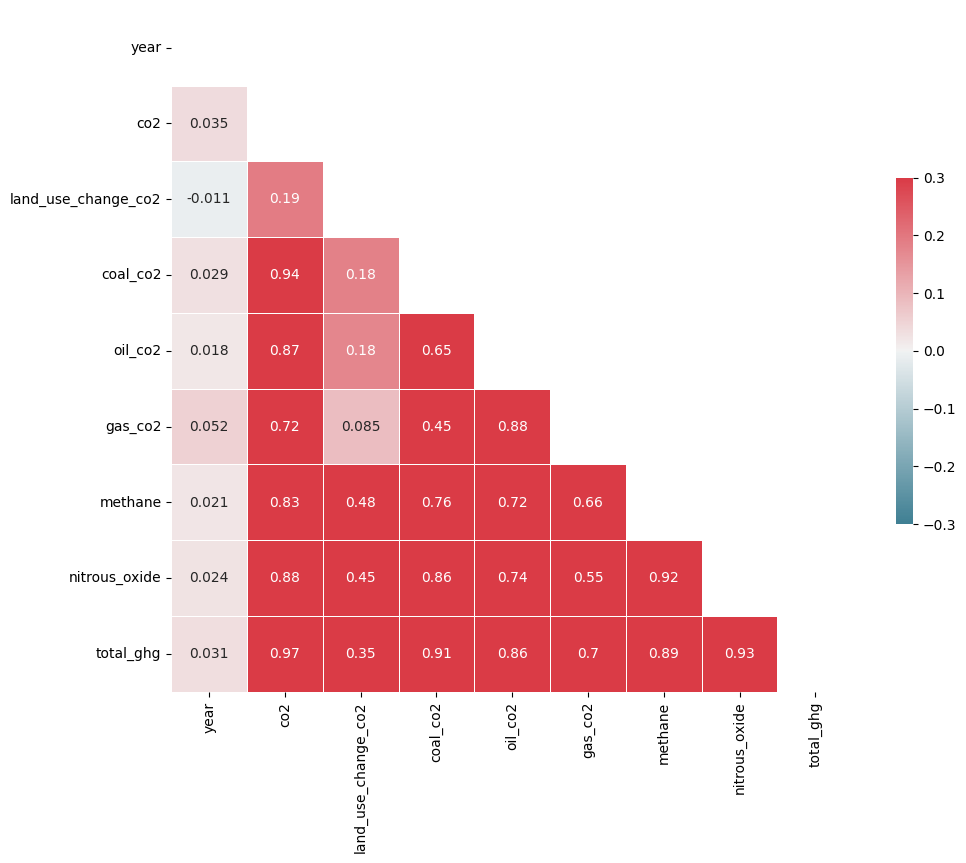

In [ ]:

# Create a correlation matrix
columns_choose = df_greeenHouseGas[['country','year','co2','land_use_change_co2','coal_co2','oil_co2','gas_co2','methane','nitrous_oxide','total_ghg']]
corr= columns_choose.corr()
display(corr)

#Potting the matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with styling

sns.heatmap(
    corr,          # The data to plot
    mask=mask,     
    cmap=cmap,     
    annot=True,    
    vmax=.3,       
    vmin=-.3,      
    center=0,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}  
)
